In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
import numpy as np

In [32]:
filename = "img.png"
image = cv.imread(filename)

<function matplotlib.pyplot.show(close=None, block=None)>

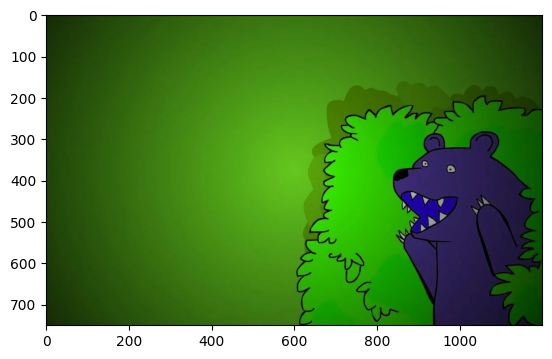

In [33]:
plt.imshow(image)
plt.show

(array([1.69340e+04, 4.18830e+04, 2.22284e+05, 1.78830e+05, 1.97662e+05,
        1.57554e+05, 7.82750e+04, 5.88600e+03, 5.95000e+02, 9.70000e+01]),
 array([  0. ,  19.4,  38.8,  58.2,  77.6,  97. , 116.4, 135.8, 155.2,
        174.6, 194. ]),
 <BarContainer object of 10 artists>)

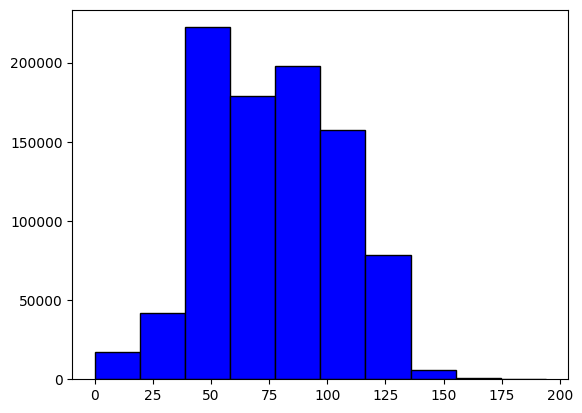

In [34]:
#преобразует BGR-изображение в полутоновое изображение
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# переведем изображение в одномерный
array1 = image_gray.flatten()
array2 = image_gray.ravel()
# Ravel — это функция библиотеки NumPy. Flatten — это метод объекта 
# ndarray. Ravel быстрее, чем Flatten.
# matplotlib
plt.hist(array2, color = 'blue', edgecolor = 'black')

C:\Users\Тёма\AppData\Local\Temp\ipykernel_12464\436707153.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(array2, hist=True, kde=False, color = 'blue', hist_kws={'edgecolor':'black'})


<Axes: >

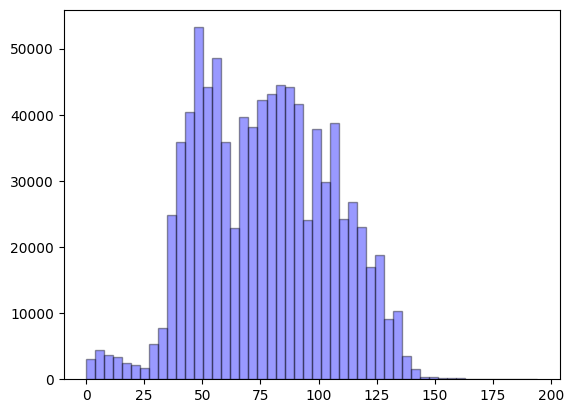

In [35]:
# seaborn
sns.distplot(array2, hist=True, kde=False, color = 'blue', hist_kws={'edgecolor':'black'})

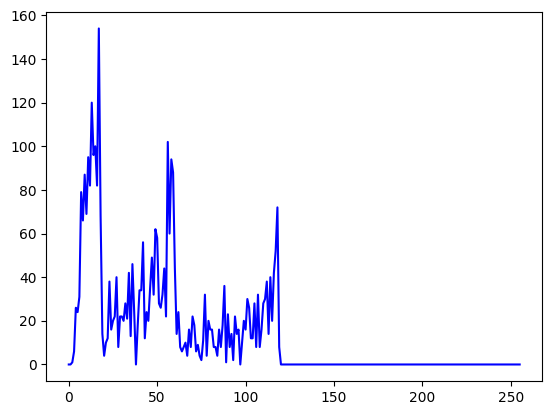

In [18]:
hist = cv.calcHist(image, [0], None, [256], [0, 256])
plt.plot(hist, color = "b")
plt.show()

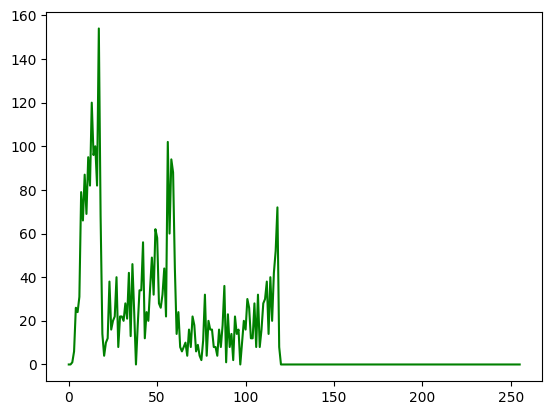

In [19]:
hist = cv.calcHist(image, [1], None, [256], [0, 256])
plt.plot(hist, color = "g")
plt.show()

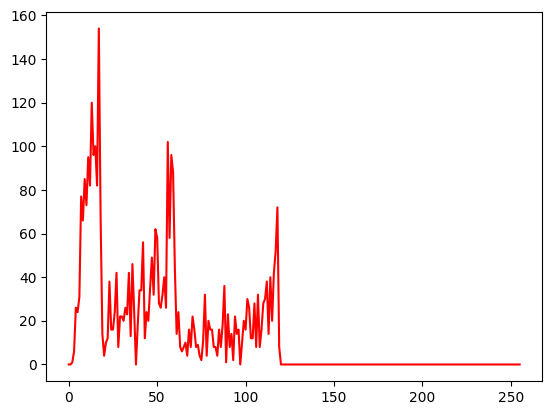

In [20]:
hist = cv.calcHist(image, [2], None, [256], [0, 256])
plt.plot(hist, color = "r")
plt.show()

In [52]:
brightness = np.sum(image_gray)
M_my = brightness / (image_gray.shape[0] * image_gray.shape[1])
M_my

np.float64(76.85734)

In [53]:
M = np.mean(image_gray)
M

np.float64(76.85734)

In [55]:
variance = np.sum((image_gray - M_my)**2) / (image_gray.shape[0] * image_gray.shape[1])
variance

np.float64(803.7405659021778)

In [57]:
D = np.var(image_gray)
D

np.float64(803.7405659021778)

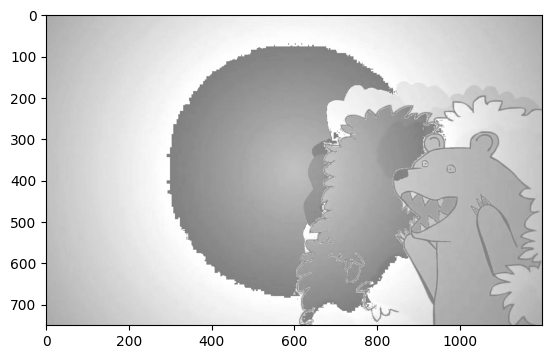

In [58]:
image_gray1 = cv.imread("img.png")
image_gray = cv.cvtColor(image_gray1, cv.COLOR_RGB2GRAY)
image1 = np.zeros(image_gray.shape)
for i in range(image_gray.shape[0]):
  for j in range(image_gray.shape[1]):
    if image_gray[i,j]<100:
      image1[i,j] = image_gray[i,j] + 100
    else: image1[i,j] = image_gray[i,j]
image1 = np.asarray(image1)

plt.imshow(image1,vmin=0,cmap="gray")
plt.show()


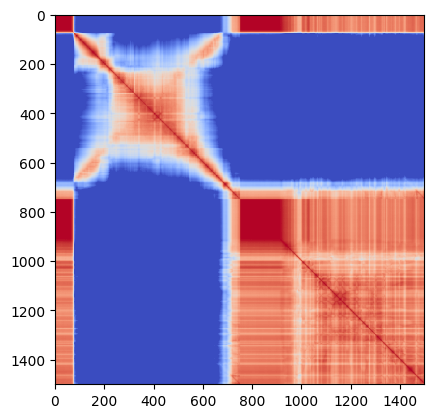

In [59]:
K = np.corrcoef(image1, image_gray)
plt.imshow(K,vmin=0,vmax=1,cmap="coolwarm")
plt.show()


In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_correlation_radius(image1, image_gray, threshold=0.7):
    # Создаем одномерные массивы из изображений
    flat_image1 = image1.ravel()
    flat_image_gray = image_gray.ravel()
    
    # Вычисляем корреляцию для каждого пикселя
    correlations = np.abs(np.corrcoef(flat_image1, flat_image_gray)[0, 1])
    
    # Создаем heatmap корреляций
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations.reshape(image1.shape), vmin=0, vmax=1, center=0, cmap='coolwarm', annot=True, fmt='.2f')
    plt.title('Корреляции между пикселями')
    plt.xlabel('Пиксели измененного изображения')
    plt.ylabel('Пиксели исходного изображения')
    plt.show()
    
    # Определяем радиус корреляции
    radius = None
    for i in range(len(image1)):
        for j in range(len(image_gray)):
            if correlations[i, j] >= threshold:
                radius = max(radius, min(i, j)) if radius is not None else min(i, j)
    
    return radius

# Использование функции
radius = calculate_correlation_radius(image1, image_gray)
print(f"Радиус корреляции: {radius}")


ValueError: cannot reshape array of size 1 into shape (750,1200)

<Figure size 1000x800 with 0 Axes>